In [2]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [3]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance 
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
>>> theta_best

array([[3.79164911],
       [3.12873857]])

In [6]:
>>> X_new = np.array([[0], [2]])
>>> X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance 
>>> y_predict = X_new_b.dot(theta_best)
>>> y_predict

array([[ 3.79164911],
       [10.04912626]])

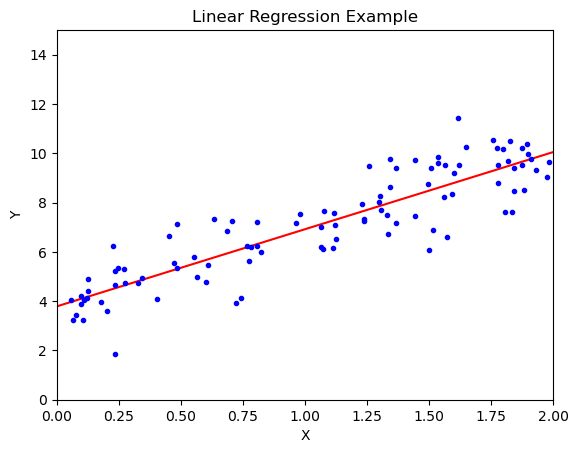

In [9]:
import matplotlib.pyplot as plt

# Assuming you have already defined X_new, y_predict, X, and y

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Regression Example")
plt.show()


In [11]:
>>> from sklearn.linear_model import LinearRegression 
>>> lin_reg = LinearRegression()
>>> lin_reg.fit(X, y)
>>> lin_reg.intercept_, lin_reg.coef_

(array([3.79164911]), array([[3.12873857]]))

In [12]:
>>> lin_reg.predict(X_new)

array([[ 3.79164911],
       [10.04912626]])

In [13]:
>>> theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6) 
>>> theta_best_svd

array([[3.79164911],
       [3.12873857]])

In [14]:
>>> np.linalg.pinv(X_b).dot(y)


array([[3.79164911],
       [3.12873857]])

In [20]:
import numpy as np

eta = 0.1  # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2, 1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

print(theta)


[[3.79164911]
 [3.12873857]]


In [22]:
 m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [23]:
>>> from sklearn.preprocessing import PolynomialFeatures
>>> poly_features = PolynomialFeatures(degree=2, include_bias=False) 
>>> X_poly = poly_features.fit_transform(X)
>>> X[0]

array([-2.56452513])

In [24]:
>>> X_poly[0]

array([-2.56452513,  6.57678916])

In [25]:
>>> lin_reg = LinearRegression()
>>> lin_reg.fit(X_poly, y)
>>> lin_reg.intercept_, lin_reg.coef_

(array([2.24057879]), array([[0.92624518, 0.46440989]]))

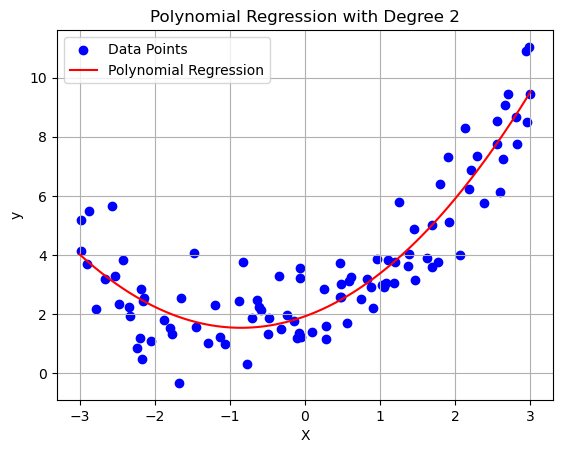

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate random features
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

# Generate polynomial features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Fit linear regression model to polynomial features
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# Plot the data points and the polynomial regression curve
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_new, y_new, color='red', label='Polynomial Regression')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression with Degree 2')
plt.legend()
plt.grid(True)
plt.show()
